   #                                 STUDENTS' PERFORMANCE IN EXAM

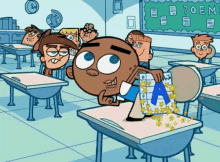

# 1. Loading Libraries to Evaluate the Performance

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2. Loading the Dataset

In [ ]:
df = pd.read_csv("../input/students-performance-in-exams/StudentsPerformance.csv")



# 3. Quick Look at the Data 

In [ ]:
df.head()

In [ ]:
df.shape

The dataset has 1000 rows & 8 columns.

In [ ]:
df.info()

From above, there is no null data in any of the cells.

In [ ]:
df.isna().sum()

From above output, it's confirm that there no values missing in our dataset.

In [ ]:
df.describe()

Maximum marks of each exam is 100. So we can set criteria of passing as 35. 

# 4. Setting Passing Criteria & Calculating Results

 pass_criteria >= 35.
 
 Adding new columns for each type of scores whether student passed/failed in respective tests.

In [ ]:
df['Math Result']=np.where(df['math score'] >= 35, 'Pass', 'Fail')
df['Reading Result']=np.where(df['reading score'] >= 35, 'Pass', 'Fail')
df['Writing Result']=np.where(df['writing score'] >= 35, 'Pass', 'Fail')


df.head()

Now, we will determine percentage marks obtained by each students.

From that we will evaluate the final result of students.

In [ ]:
df['Percentage'] = round((df['math score']+ df['reading score']+ df['writing score'])/3, 2)

df['Final Result'] = df.apply(lambda x: 'PASS' if x['Math Result']=='Pass' and x['Reading Result']=='Pass' and x['Writing Result']=='Pass'
                              and x['Percentage']>= 35 else 'FAIL', axis=1)

df.head(20)

## 4.1 Grading System 

|  % Range      | Grade     | Qualificarition     |
| :-------------| :----------: | -----------: |
|  >=95   |   A+   | Outstanding    |
|  >=90   |   A    | Excellent |
|  >=80   |   B+   | Very Good |
|  >=70   |   B    | Good      |
|  >=60   |   C    | Average   |
|  >=50   |   D    | Sufficient|
|  >=35  |   E    | Passable  |
|  <35   |   F    | Fail      |

This is how we are going to assign the grades to students according to their final percentages.

In [ ]:
def Grade(Percentage):
    if (Percentage >= 95): return 'A+'
    elif (Percentage >= 90): return 'A'
    elif (Percentage >= 80): return 'B+'
    elif (Percentage >= 70): return 'B'
    elif (Percentage >= 60): return 'C'
    elif (Percentage >= 50): return 'D'
    elif (Percentage >= 35): return 'E'
    else: return 'F'
        
df['Grade'] = df.apply(lambda x: Grade(x['Percentage']), axis=1)
df.head(20)

We have prepared the final results along with percentages & Grading system.

# 5. Visualizaton of Final Result 

## 5.1 Overall visualization

In [ ]:
sns.pairplot(df)

## 5.2 Gradewise Count of Number of Students 

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.countplot(x='Grade', data = df, hue='gender', order=['A+', 'A', 'B+', 'B', 'C', 'D','E', 'F'])
plt.show()


In [ ]:
plt.figure(figsize=(15,5))
df['Grade'].value_counts().plot.pie(autopct='%1.1f%%')


There are more students having 'B' & 'C' grades while lesser students having 'A+', 'A', & 'F' grades

## 5.3 Total Number of Students Passed & Failed 

In [ ]:
plt.figure(figsize=[10,5])

plt.pie(df['Final Result'].value_counts(), labels=['PASS', 'FAIL'],colors=['Lightgreen','Red'], explode=[0.1,0], autopct='%1.1f%%', shadow=True, startangle=360)
plt.title('Final Result', fontweight='bold', size=20)

From the above pie chart, we can conclude that 2.9% students failed in the exam.

## 5.4 Genderwise Total Number of Students Passed & Failed 

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=[8,5])
sns.countplot(x='Final Result', data=df, hue='gender')
plt.xlabel('Final Result')
plt.ylabel('Number of Students')
plt.title('Number of  Students Passed & Failed', fontweight='bold', size= 15)

## 5.5 Number of Students Passed & Failed on the basis of Test Preparation Course

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
sns.barplot(x = 'test preparation course', y = 'math score',hue = 'gender', data = df).set_title('Math Score')

plt.subplot(1,3,2)
sns.barplot(x = 'test preparation course', y = 'reading score', hue = 'gender', data = df).set_title('Reading Score')

plt.subplot(1,3,3)
sns.barplot(x = 'test preparation course', y = 'writing score',hue = 'gender', data = df).set_title('Writing Score')

plt.tight_layout()

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))

sns.countplot(x ='Final Result', hue = 'test preparation course', data = df).set_title('Final Result Based on Test Preparation Course')

There is more number of students who had not taken 'Test Preparation Course' than those who had completed the course.  

## 5.6 Comaparison of Percentage with each type of score 

In [ ]:
sns.set_style('whitegrid')
sns.jointplot(x='Percentage', y='math score',hue='gender',kind='scatter', data=df).fig.suptitle(' Percantage vs Math Score')
plt.show()

sns.jointplot(x='Percentage', y='reading score', hue='gender',data=df).fig.suptitle(' Percantage vs Reading Score')
plt.show()

sns.jointplot(x='Percentage', y='writing score', hue='gender', data=df).fig.suptitle(' Percantage vs Writing Score')
plt.show()

## 5.7 Based on Parent Level of Education 

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=[16,7])
sns.countplot(x='parental level of education' ,data=df, hue='Grade', 
            order=["master's degree", "bachelor's degree", "associate's degree", "some college",'high school','some high school'],
            hue_order=['A+', 'A', 'B+', 'B', 'C', 'D','E', 'F'])
plt.xlabel('Parental Level of Education', fontsize=15)
plt.ylabel('Number of Students', fontsize=15)
plt.legend()

Students' whose parents have master's or bachelor's degree havn't failed in exam.

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=[10,5])
sns.countplot(x='parental level of education' ,data=df, hue='Final Result', 
            order=["master's degree", "bachelor's degree", "associate's degree", "some college",'high school','some high school'])
plt.xlabel('Parental Level of Education', fontsize=15)
plt.ylabel('Number of Students', fontsize=15)

HELLO EVERYONE,

THIS IS MY FIRST KAGGLE PROGRAMME.
PLEASE COMMENT & GIVE SUGGESSIONS FREELY.
YOUR COMMENTS/SUGGESSIONS WILL BOOST MY CONFIDENCE AND MOTIVATE ME FOR CONTINUING THE CODING. 